`The dataset I am going to use consists of reviews of fine foods from amazon. The data spans a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.` 

# Step 1: Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot") #setting the style of the plots
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Step 2: Reading the dataset

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df["Text"].values[1] # we will be running sentiment analysis on this column

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [6]:
df.shape #it is a very large dataset, I will create a smaller dataset with the first 10000 rows

(568454, 10)

In [7]:
smaller_df = df.head(10000)

In [8]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


# Step 3: Quick EDA

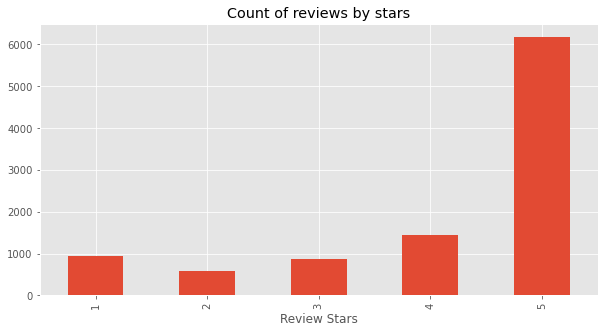

In [9]:
ax = smaller_df["Score"].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars',
                                                    figsize=(10, 5)) #Creating a barplot with the Review stars
ax.set_xlabel('Review Stars') #This line of code sets a label in axis x
plt.show()

#### Most of the reviews are 5-stars:

In [10]:
smaller_df["Score"].value_counts(normalize=True)*100

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

# Step 4: Basic NLTK

In [11]:
# Let's start with an example
example = smaller_df["Text"][100]

In [12]:
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [13]:
smaller_df["Score"][100]

5

In [14]:
example2 = smaller_df["Text"][789]

In [15]:
example2

'The whole idea of a Spongebob Ginger Bread Pineapple is really great, but the sticker that says "Use By" Has a 10 JN 16 date on it. If thats 2010- this is not good! I think it would be fun to make and a cute decoration, but my son is going to want to eat it.  The least the seller could do is to check the expiration date! Its right on the front of the box! Not happy at all!!!'

In [16]:
smaller_df["Score"][789]

2

In [17]:
# I will work with the second example since it is very clear that it is a negative review

In [18]:
tokens = nltk.word_tokenize(example2) #splitting the text into tokens
tokens[:15]

['The',
 'whole',
 'idea',
 'of',
 'a',
 'Spongebob',
 'Ginger',
 'Bread',
 'Pineapple',
 'is',
 'really',
 'great',
 ',',
 'but',
 'the']

In [19]:
# Let's find the part of the speech for these words
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('whole', 'JJ'),
 ('idea', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('Spongebob', 'NNP'),
 ('Ginger', 'NNP'),
 ('Bread', 'NNP'),
 ('Pineapple', 'NNP'),
 ('is', 'VBZ'),
 ('really', 'RB'),
 ('great', 'JJ'),
 (',', ','),
 ('but', 'CC'),
 ('the', 'DT'),
 ('sticker', 'NN'),
 ('that', 'WDT'),
 ('says', 'VBZ'),
 ('``', '``'),
 ('Use', 'NNP'),
 ('By', 'IN'),
 ("''", "''"),
 ('Has', 'VBZ'),
 ('a', 'DT'),
 ('10', 'CD'),
 ('JN', 'NNP'),
 ('16', 'CD'),
 ('date', 'NN'),
 ('on', 'IN'),
 ('it', 'PRP'),
 ('.', '.'),
 ('If', 'IN'),
 ('thats', 'JJ'),
 ('2010-', 'CD'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('!', '.'),
 ('I', 'PRP'),
 ('think', 'VBP'),
 ('it', 'PRP'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('fun', 'VBN'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('cute', 'JJ'),
 ('decoration', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('my', 'PRP$'),
 ('son', 'NN'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('want', 'VB'),
 ('to', 'TO'),
 ('ea

In [20]:
tagged = nltk.pos_tag(tokens[:10])

In [21]:
tagged

[('The', 'DT'),
 ('whole', 'JJ'),
 ('idea', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('Spongebob', 'NNP'),
 ('Ginger', 'NNP'),
 ('Bread', 'NNP'),
 ('Pineapple', 'NNP'),
 ('is', 'VBZ')]

###### https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/

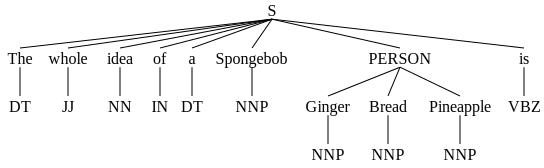

In [22]:
# Let's convert these pos into entities
entities = nltk.chunk.ne_chunk(tagged)
entities

In [23]:
#pip install svgling


In [24]:
entities.pprint()

(S
  The/DT
  whole/JJ
  idea/NN
  of/IN
  a/DT
  Spongebob/NNP
  (PERSON Ginger/NNP Bread/NNP Pineapple/NNP)
  is/VBZ)


# Step 5: Let's start using VADER for our Sentiment Analysis

##### This analyser uses a "bag of words" approach, we remove the stopwords (words that do not add any meaning to the text)

In [25]:
sia = SentimentIntensityAnalyzer()

In [26]:
# Let's start running this with small texts
sia.polarity_scores("I am not happy")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

In [27]:
sia.polarity_scores("I really like this movie")

{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.4201}

In [28]:
sia.polarity_scores("I absolutely love this movie")

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6697}

In [29]:
# Let's use the second example from before:
sia.polarity_scores(example2)

{'neg': 0.078, 'neu': 0.77, 'pos': 0.151, 'compound': 0.769}

In [30]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [31]:
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [32]:
# Let's run the polarity score on the entire dataset with a loop:
results = {}
for i, row in tqdm(smaller_df.iterrows(), total=len(smaller_df)):
    text = row["Text"]
    my_id = row["Id"]
    results[my_id] = sia.polarity_scores(text)


  0%|          | 0/10000 [00:00<?, ?it/s]

In [33]:
results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [34]:
# Let's create a dataframe with this dictionary:
vaders = pd.DataFrame(results).T

In [35]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [36]:
vaders = vaders.reset_index().rename(columns = {'index':"Id"}) #renaming the index so it is the same as the smaller df
vaders = vaders.merge(smaller_df, how='left') #we are doing a left merge, sentiment score + original df

In [37]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Step 6: Plotting Vader Results

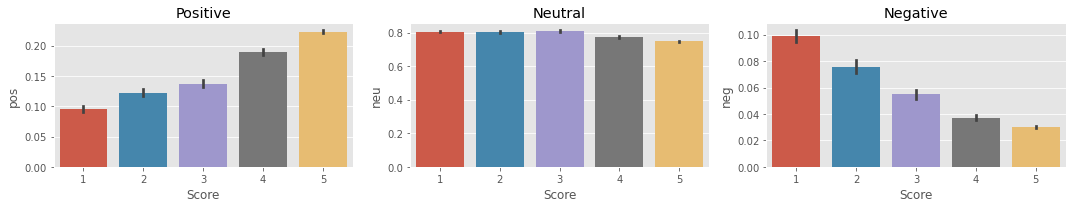

In [38]:
# Let's do a barplot with this data:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

#### Not bad results! However, this model doesn't pick up on the relationships between words, next time I will try with The roBERta model!